## Homework

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').  

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) or download using wget link mentioned below:

```
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

```

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.


## Loading the data

Use only the following columns:  
* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`  

* Fill NAs with 0.
* Apply the log tranform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer` to turn the dataframe into matrices.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction import DictVectorizer

In [2]:
data= pd.read_csv('homework_6\housing.csv')

In [3]:
df=data.copy()

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
features_list= ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 
'median_house_value','ocean_proximity']

In [7]:
df_full=df[features_list]

In [8]:
df_full

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
# Fill NAs with 0.
df_full.fillna(0, inplace= True)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

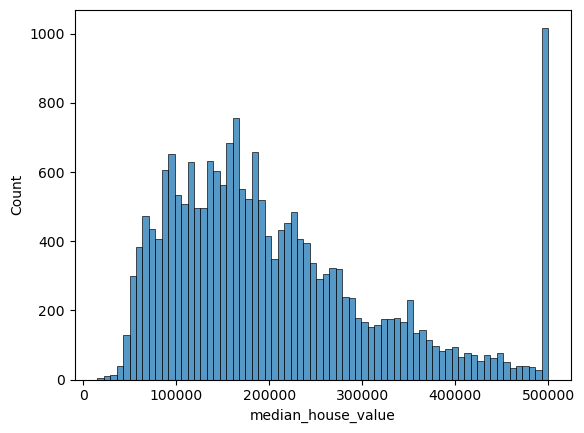

In [10]:
sns.histplot(df_full['median_house_value'] , bins= 70)

In [11]:
#Apply the log tranform to median_house_value.
df_full['median_house_value']= np.log1p(df_full['median_house_value'])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

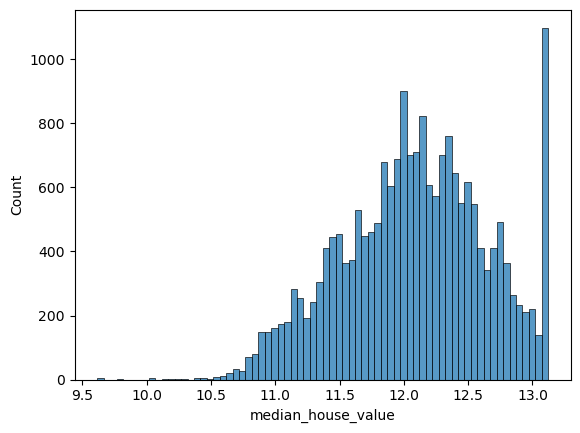

In [12]:
sns.histplot(df_full['median_house_value'] , bins= 70)

In [13]:
#Do train/validation/test split with 60%/20%/20% distribution.

#Use the train_test_split function and set the random_state parameter to 1.

from sklearn.model_selection import train_test_split

df_full_train, df_val= train_test_split(df_full, random_state=1, test_size=0.20)
df_train, df_test= train_test_split(df_full_train, random_state=1, test_size=0.25)

y_train=df_train['median_house_value']
y_val=df_val['median_house_value']
y_test=df_test['median_house_value']

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value'] 



In [14]:
#Use `DictVectorizer` to turn the dataframe into matrices.

dv=DictVectorizer(sparse=False)
dict_train=df_train.to_dict(orient='records')
X_train=dv.fit_transform(dict_train)

dict_val=df_val.to_dict(orient='records')
X_val=dv.transform(dict_val)

dict_test=df_test.to_dict(orient='records')
X_test=dv.transform(dict_test)

In [15]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']


## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity=INLAND`
* `total_rooms`
* `latitude`
* `population`

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [17]:
dt=DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=1)

In [18]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



C:\Users\Asia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)




## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1`  (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.05
* 0.25
* 0.55
* 0.85



In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [20]:
rf= RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_predicted= rf.predict(X_val)


In [21]:
print(f"RMSE is {np.sqrt(mean_squared_error(y_val, y_predicted))}")

RMSE is 0.24847920284661482



## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 150



In [22]:
from IPython.display import display

df_scores=pd.DataFrame(columns=['n_estimators', 'RMSE'])
scores=[]
for i in range (10, 201, 10):
    rf= RandomForestRegressor(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_predicted= rf.predict(X_val)
    RMSE=np.sqrt(mean_squared_error(y_val, y_predicted))
    scores.append((i, RMSE))
    
df_scores=pd.DataFrame(scores, columns=['n_estimators', 'RMSE'])


In [23]:
df_scores.sort_values(by='RMSE' , ascending= True)

,n_estimators,RMSE
17,180,0.237514
18,190,0.237562
19,200,0.237586
16,170,0.237632
14,150,0.237690
15,160,0.237739
9,100,0.237742
13,140,0.237753
8,90,0.237769
12,130,0.237852


(0.234, 0.241)

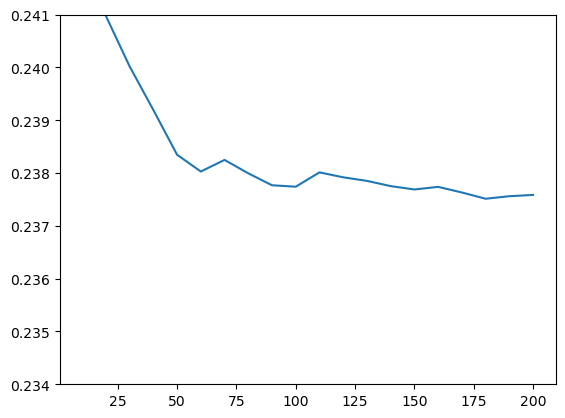

In [24]:
plt.plot(df_scores['n_estimators'], df_scores['RMSE'])
plt.ylim(0.234, 0.241)


After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 150

ans is 150


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
* Fix the random seed: `random_state=1`


What's the best `max_depth`:

* 10
* 15
* 20
* 25



In [25]:
df_scores=pd.DataFrame(columns=['max_depth','n_estimators','RMSE'])
scores=[]

for j in [10, 15, 20, 25]:
    for i in range (10, 201, 10):
        rf= RandomForestRegressor(n_estimators=i, max_depth= j, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_predicted= rf.predict(X_val)
        RMSE=np.sqrt(mean_squared_error(y_val, y_predicted))
        scores.append((j,i, RMSE))
    
df_scores=pd.DataFrame(scores, columns=['max_depth','n_estimators', 'RMSE'])

In [26]:
df_scores.sort_values(by='RMSE' , ascending= True)

,max_depth,n_estimators,RMSE
77,25,180,0.237484
78,25,190,0.237523
79,25,200,0.237532
76,25,170,0.237615
68,25,90,0.237678
...,...,...,...
15,10,160,0.256344
14,10,150,0.256347
3,10,40,0.256374
1,10,20,0.256483


In [27]:
#df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['auc'])
df_scores_pivot=df_scores.pivot(index="n_estimators", columns='max_depth', values='RMSE')
df_scores_pivot

max_depth,10,15,20,25
n_estimators,,,,
10,0.258207,0.248425,0.247767,0.249909
20,0.256483,0.242471,0.240970,0.241227
30,0.256340,0.241357,0.240078,0.239885
40,0.256374,0.240916,0.239390,0.239085
50,0.255969,0.240233,0.238345,0.238236
60,0.255790,0.239779,0.238186,0.237749
70,0.256085,0.240107,0.238440,0.238027
80,0.256104,0.239995,0.238208,0.237837
90,0.255960,0.239911,0.237970,0.237678


<AxesSubplot:xlabel='max_depth', ylabel='n_estimators'>

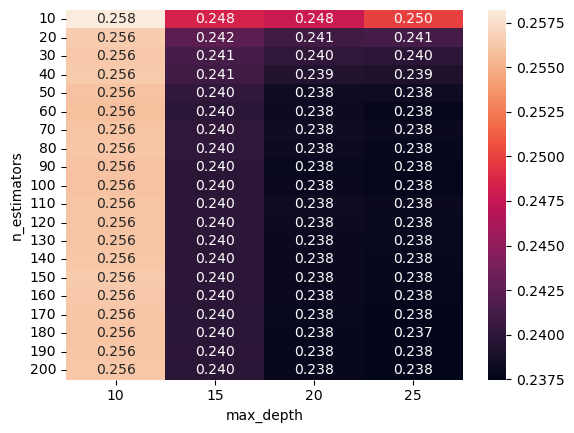

In [28]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

The loswest RMSE is 0.237 at max_depth 25

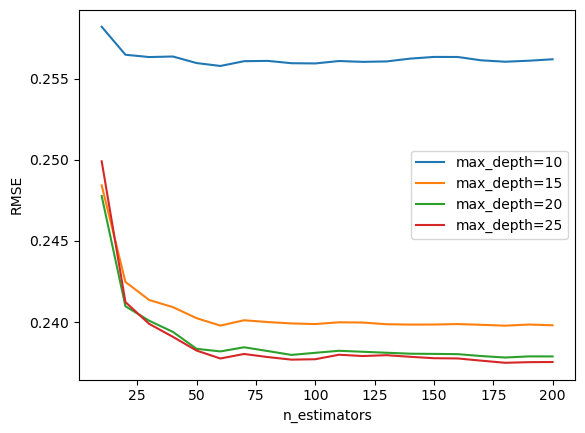

In [29]:
for j in [10, 15, 20, 25]:
    df_set=df_scores[df_scores['max_depth']==j]
    plt.plot(df_set['n_estimators'], df_set['RMSE'] , label=f"max_depth={j}")
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.legend()
    


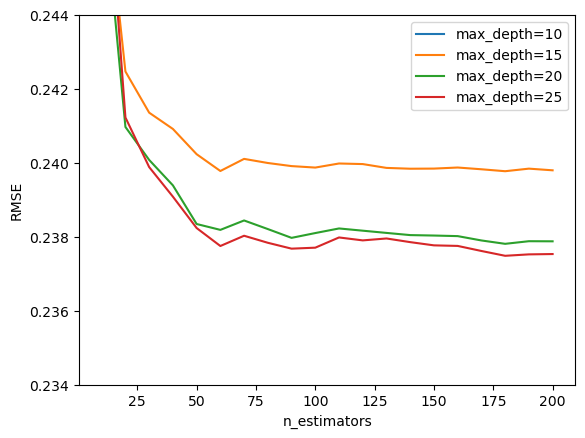

In [30]:
for j in [10, 15, 20, 25]:
    df_set=df_scores[df_scores['max_depth']==j]
    plt.plot(df_set['n_estimators'], df_set['RMSE'] , label=f"max_depth={j}")
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.ylim(0.234, 0.244)

plt.legend()
    


What's the best `max_depth`:

* 10
* 15
* 20
* 25

ans: 25


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorith, it finds the best split. 
When doint it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the imporatant features 
for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parametes:
    * `n_estimators=10`,
    * `max_depth=20`,
    * `random_state=1`,
    * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature? 

* `total_rooms`
* `median_income`	
* `total_bedrooms`
* `longitude`


In [31]:
rf=RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [32]:
rf.feature_importances_

array([1.69573183e-02, 3.30938997e-02, 1.01333971e-01, 9.62649876e-02,
       3.62912907e-01, 3.00723750e-03, 3.10900842e-01, 3.56806263e-04,
       4.48661972e-04, 4.22762446e-03, 3.09180197e-02, 1.90412562e-02,
       2.05364687e-02])

In [33]:
dv.feature_names_

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [34]:
dv.feature_names_[np.argmax(rf.feature_importances_)]

'median_income'

In [35]:
feature_importances_df=pd.DataFrame({"feature_name": dv.feature_names_, 'feature_importances_score': rf.feature_importances_})

In [36]:
feature_importances_df.sort_values(by='feature_importances_score' , ascending=False)

,feature_name,feature_importances_score
4,median_income,0.362913
6,ocean_proximity=INLAND,0.310901
2,latitude,0.101334
3,longitude,0.096265
1,housing_median_age,0.033094
10,population,0.030918
12,total_rooms,0.020536
11,total_bedrooms,0.019041
0,households,0.016957
9,ocean_proximity=NEAR OCEAN,0.004228


What's the most important feature? 

* `total_rooms`
* `median_income`	
* `total_bedrooms`
* `longitude`

ans: median_income



## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same



In [37]:
!pip install xgboost

In [38]:
import xgboost as xgb

In [40]:
features = dv.get_feature_names()
features= [i.replace("=<", "_").replace("=","_") for i in features]
features


C:\Users\Asia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [41]:
#Create DMatrix for train and validation
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [42]:

#Create a watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [46]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)
s0 = output.stdout


In [47]:
print(s0)

[0]	train-rmse:8.12733	val-rmse:8.10822
[5]	train-rmse:1.40218	val-rmse:1.39441
[10]	train-rmse:0.34481	val-rmse:0.35440
[15]	train-rmse:0.23555	val-rmse:0.26129
[20]	train-rmse:0.21580	val-rmse:0.24823
[25]	train-rmse:0.20395	val-rmse:0.24298
[30]	train-rmse:0.19440	val-rmse:0.23996
[35]	train-rmse:0.18637	val-rmse:0.23807
[40]	train-rmse:0.17983	val-rmse:0.23578
[45]	train-rmse:0.17468	val-rmse:0.23480
[50]	train-rmse:0.16934	val-rmse:0.23360
[55]	train-rmse:0.16546	val-rmse:0.23260
[60]	train-rmse:0.16177	val-rmse:0.23210
[65]	train-rmse:0.15762	val-rmse:0.23174
[70]	train-rmse:0.15323	val-rmse:0.23104
[75]	train-rmse:0.15010	val-rmse:0.23078
[80]	train-rmse:0.14564	val-rmse:0.22995
[85]	train-rmse:0.14166	val-rmse:0.22988
[90]	train-rmse:0.13892	val-rmse:0.22984
[95]	train-rmse:0.13553	val-rmse:0.22962
[99]	train-rmse:0.13299	val-rmse:0.22971



In [48]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_RMSE', 'test_RMSE']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [49]:
df_score0 = parse_xgb_output(output)
df_score0

,num_iter,train_RMSE,test_RMSE
0,0,8.12733,8.10822
1,5,1.40218,1.39441
2,10,0.34481,0.35440
3,15,0.23555,0.26129
4,20,0.21580,0.24823
5,25,0.20395,0.24298
6,30,0.19440,0.23996
7,35,0.18637,0.23807
8,40,0.17983,0.23578
9,45,0.17468,0.23480


In [50]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)
s1 = output.stdout


In [51]:
print(s1)

[0]	train-rmse:8.12733	val-rmse:8.10822
[5]	train-rmse:1.40218	val-rmse:1.39441
[10]	train-rmse:0.34481	val-rmse:0.35440
[15]	train-rmse:0.23555	val-rmse:0.26129
[20]	train-rmse:0.21580	val-rmse:0.24823
[25]	train-rmse:0.20395	val-rmse:0.24298
[30]	train-rmse:0.19440	val-rmse:0.23996
[35]	train-rmse:0.18637	val-rmse:0.23807
[40]	train-rmse:0.17983	val-rmse:0.23578
[45]	train-rmse:0.17468	val-rmse:0.23480
[50]	train-rmse:0.16934	val-rmse:0.23360
[55]	train-rmse:0.16546	val-rmse:0.23260
[60]	train-rmse:0.16177	val-rmse:0.23210
[65]	train-rmse:0.15762	val-rmse:0.23174
[70]	train-rmse:0.15323	val-rmse:0.23104
[75]	train-rmse:0.15010	val-rmse:0.23078
[80]	train-rmse:0.14564	val-rmse:0.22995
[85]	train-rmse:0.14166	val-rmse:0.22988
[90]	train-rmse:0.13892	val-rmse:0.22984
[95]	train-rmse:0.13553	val-rmse:0.22962
[99]	train-rmse:0.13299	val-rmse:0.22971



In [52]:
df_score1 = parse_xgb_output(output)
df_score1

,num_iter,train_RMSE,test_RMSE
0,0,10.44372,10.42225
1,5,6.17513,6.15936
2,10,3.65741,3.64515
3,15,2.17500,2.16544
4,20,1.30499,1.29870
5,25,0.79933,0.79665
6,30,0.51144,0.51430
7,35,0.35700,0.36679
8,40,0.27984,0.29645
9,45,0.24350,0.26568


In [53]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)
s2 = output.stdout


In [54]:
print(s2)

[0]	train-rmse:10.44372	val-rmse:10.42225
[5]	train-rmse:6.17513	val-rmse:6.15936
[10]	train-rmse:3.65741	val-rmse:3.64515
[15]	train-rmse:2.17500	val-rmse:2.16544
[20]	train-rmse:1.30499	val-rmse:1.29870
[25]	train-rmse:0.79933	val-rmse:0.79665
[30]	train-rmse:0.51144	val-rmse:0.51430
[35]	train-rmse:0.35700	val-rmse:0.36679
[40]	train-rmse:0.27984	val-rmse:0.29645
[45]	train-rmse:0.24350	val-rmse:0.26568
[50]	train-rmse:0.22614	val-rmse:0.25285
[55]	train-rmse:0.21695	val-rmse:0.24702
[60]	train-rmse:0.21035	val-rmse:0.24302
[65]	train-rmse:0.20579	val-rmse:0.24079
[70]	train-rmse:0.20116	val-rmse:0.23856
[75]	train-rmse:0.19680	val-rmse:0.23668
[80]	train-rmse:0.19384	val-rmse:0.23572
[85]	train-rmse:0.19085	val-rmse:0.23456
[90]	train-rmse:0.18794	val-rmse:0.23340
[95]	train-rmse:0.18541	val-rmse:0.23240
[99]	train-rmse:0.18329	val-rmse:0.23174



In [55]:
df_score2 = parse_xgb_output(output)
df_score2

,num_iter,train_RMSE,test_RMSE
0,0,11.48634,11.46382
1,5,10.92424,10.90228
2,10,10.38969,10.36832
3,15,9.88136,9.86059
4,20,9.39796,9.37782
5,25,8.93827,8.91875
6,30,8.50110,8.48219
7,35,8.08539,8.06706
8,40,7.69008,7.67232
9,45,7.31418,7.29696


In [56]:
lbl=['0.3' , '0.1' , '0.01']


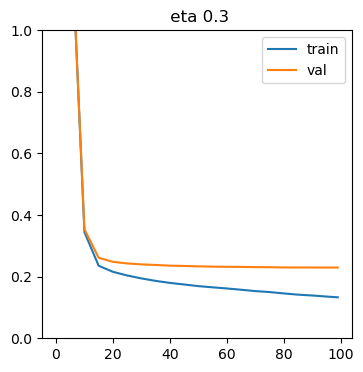

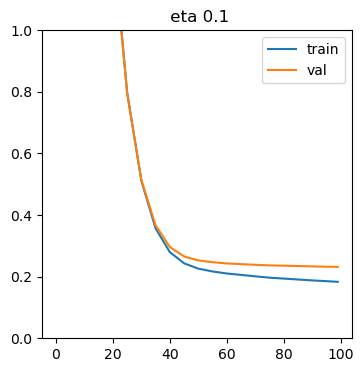

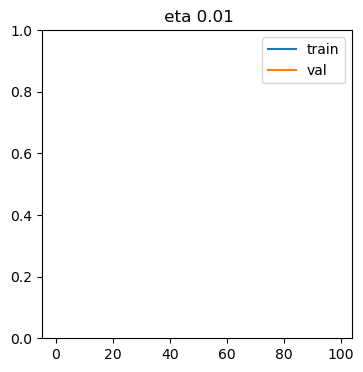

In [57]:
for i , k in enumerate([df_score0,df_score1, df_score2]):
    plt.figure(figsize=(4,4))
    plt.plot(k.num_iter, k.train_RMSE, label='train')
    plt.plot(k.num_iter, k.test_RMSE, label='val')
    plt.ylim(0, 1)
    plt.title( f" eta {lbl[i]}")

    plt.legend()

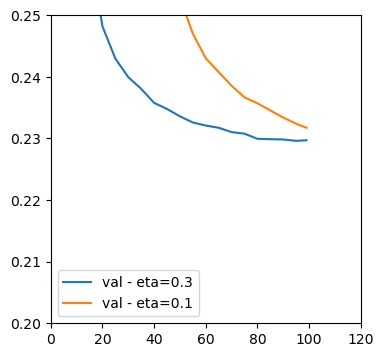

In [58]:
plt.figure(figsize=(4,4))
   # plt.plot(k.num_iter, k.train_RMSE, label='train')
plt.plot(df_score0.num_iter, df_score0.test_RMSE, label='val - eta=0.3')
plt.plot(df_score1.num_iter, df_score1.test_RMSE, label='val - eta=0.1')
plt.ylim([0.20, 0.25])
plt.xlim(0, 120)



plt.legend()


Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both gives same

ans: 0.3


## Submit the results

* Submit your results here: https://forms.gle/3yMSuQ4BeNuZFHTU8
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 17 October (Monday), 23:00 CEST.

After that, the form will be closed.